历史k线最高价与最低价相关系数

In [1]:
import polars as pl
import numpy as np

# 读取数据
df = pl.read_parquet("daily_data.pa")

# 设置窗口大小 N
N = 65

# 创建一个空的列表来存储结果
result_rows = []

# 获取所有的 unique symbols
symbols = df["symbol"].unique()

# 计算相关系数的函数
def rolling_corr(high, low):
    return np.corrcoef(high, low)[0, 1]

# 使用 groupby 进行分组并计算滚动窗口的相关系数
def calculate_rolling_corr(group):
    high_series = group["high"].to_numpy()
    low_series = group["low"].to_numpy()

    rolling_correlations = []
    for i in range(N - 1, len(high_series)):
        high_window = high_series[i - N + 1:i + 1]
        low_window = low_series[i - N + 1:i + 1]
        correlation = rolling_corr(high_window, low_window)
        rolling_correlations.append(correlation)

    return pl.DataFrame({
        "open_time": group["open_time"][N - 1:],
        "symbol": group["symbol"][N - 1:],
        "correlation": rolling_correlations
    })

# 使用groupby进行分组并应用函数
result_df = df.groupby("symbol").apply(calculate_rolling_corr)

# 打印结果
print(result_df)


/var/folders/8p/_lylf4tn2yz39y4qkw9vg1jw0000gn/T/ipykernel_10506/3380927269.py:39: DeprecationWarning: `groupby` is deprecated. It has been renamed to `group_by`.
  result_df = df.groupby("symbol").apply(calculate_rolling_corr)
/var/folders/8p/_lylf4tn2yz39y4qkw9vg1jw0000gn/T/ipykernel_10506/3380927269.py:39: DeprecationWarning: `apply` is deprecated. It has been renamed to `map_groups`.
  result_df = df.groupby("symbol").apply(calculate_rolling_corr)


shape: (174_513, 3)
┌─────────────────────┬─────────┬─────────────┐
│ open_time           ┆ symbol  ┆ correlation │
│ ---                 ┆ ---     ┆ ---         │
│ datetime[μs]        ┆ str     ┆ f64         │
╞═════════════════════╪═════════╪═════════════╡
│ 2020-03-05 00:00:00 ┆ BCHUSDT ┆ 0.968886    │
│ 2020-03-06 00:00:00 ┆ BCHUSDT ┆ 0.967057    │
│ 2020-03-07 00:00:00 ┆ BCHUSDT ┆ 0.964498    │
│ 2020-03-08 00:00:00 ┆ BCHUSDT ┆ 0.960354    │
│ 2020-03-09 00:00:00 ┆ BCHUSDT ┆ 0.959461    │
│ …                   ┆ …       ┆ …           │
│ 2024-03-08 00:00:00 ┆ TLMUSDT ┆ 0.953884    │
│ 2024-03-09 00:00:00 ┆ TLMUSDT ┆ 0.958951    │
│ 2024-03-10 00:00:00 ┆ TLMUSDT ┆ 0.962519    │
│ 2024-03-11 00:00:00 ┆ TLMUSDT ┆ 0.966071    │
│ 2024-03-12 00:00:00 ┆ TLMUSDT ┆ 0.969913    │
└─────────────────────┴─────────┴─────────────┘


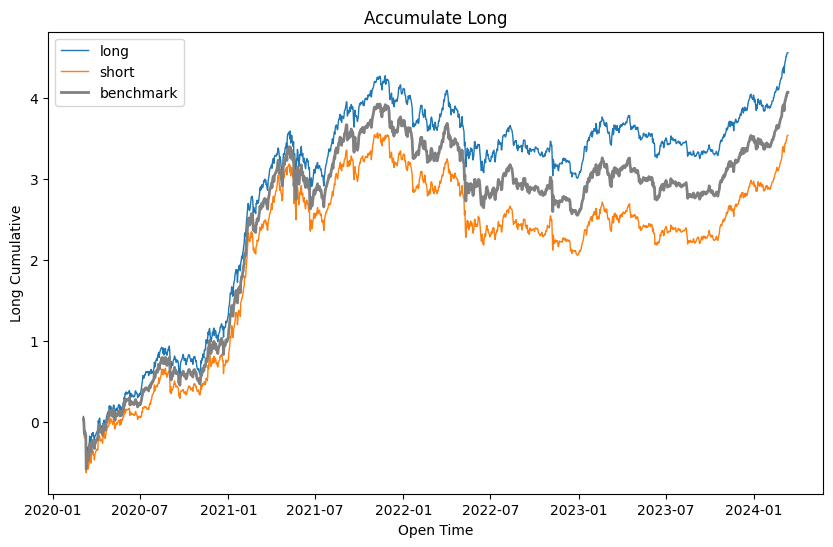

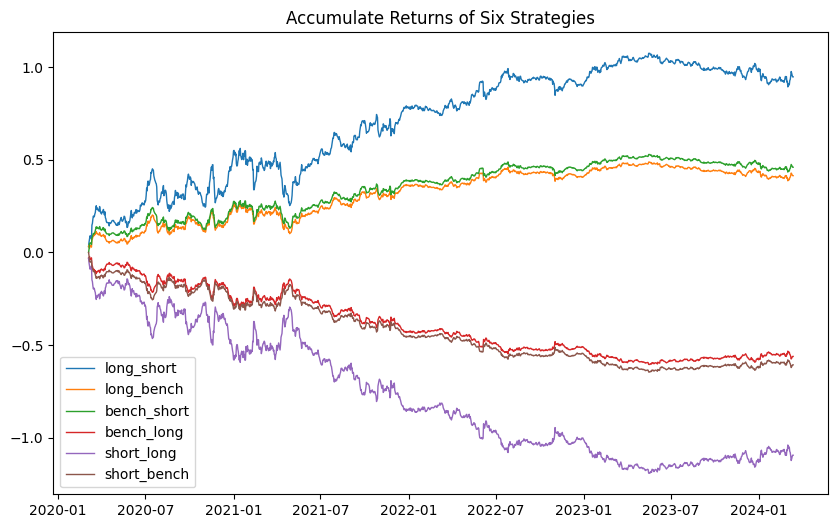

long: 
ann_return = 27.1965  sharpe = 5.893  maxdd = 0.5807  calmar_ratio = 46.8344  

short: 
ann_return = 21.1147  sharpe = 4.6901  maxdd = 0.6372  calmar_ratio = 33.1375  

bench: 
ann_return = 24.2907  sharpe = 5.392  maxdd = 0.5957  calmar_ratio = 40.7755  

long_short: 
ann_return = 5.6438  sharpe = 4.3892  maxdd = 0.1975  calmar_ratio = 28.5751  

long_bench: 
ann_return = 2.4678  sharpe = 3.7978  maxdd = 0.1302  calmar_ratio = 18.952  

bench_long: 
ann_return = -3.3438  sharpe = -5.1459  maxdd = 0.595  calmar_ratio = -5.6194  

short_long: 
ann_return = -6.5198  sharpe = -5.0705  maxdd = 1.1971  calmar_ratio = -5.4466  

short_bench: 
ann_return = -3.6141  sharpe = -5.5822  maxdd = 0.6449  calmar_ratio = -5.604  

bench_short: 
ann_return = 2.7381  sharpe = 4.2291  maxdd = 0.1162  calmar_ratio = 23.5663  



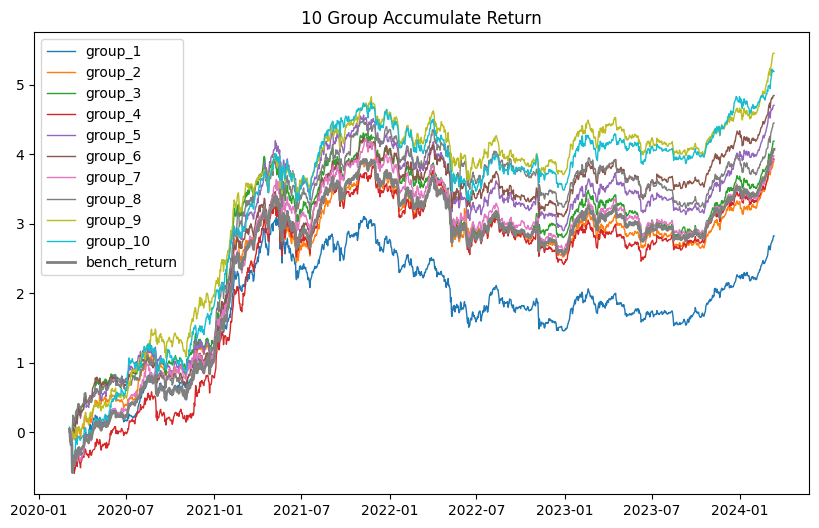

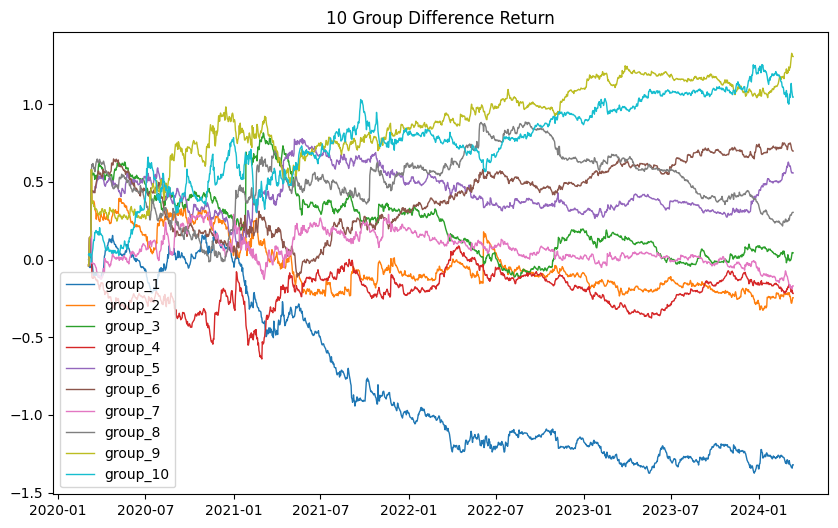

group_1: 
ann_return = 16.8492  sharpe = 3.7924  maxdd = 0.5927  calmar_ratio = 28.4263  

group_2: 
ann_return = 23.2653  sharpe = 5.0633  maxdd = 0.2867  calmar_ratio = 81.1488  

group_3: 
ann_return = 24.9874  sharpe = 5.3452  maxdd = 0.298  calmar_ratio = 83.861  

group_4: 
ann_return = 23.4282  sharpe = 4.926  maxdd = 0.5952  calmar_ratio = 39.3626  

group_5: 
ann_return = 28.0557  sharpe = 6.0888  maxdd = 0.2997  calmar_ratio = 93.6085  

group_6: 
ann_return = 28.8967  sharpe = 6.2612  maxdd = 0.2182  calmar_ratio = 132.4397  

group_7: 
ann_return = 23.72  sharpe = 5.0626  maxdd = 0.5016  calmar_ratio = 47.2872  

group_8: 
ann_return = 26.542  sharpe = 5.6208  maxdd = 0.278  calmar_ratio = 95.4898  

group_9: 
ann_return = 32.5275  sharpe = 6.8895  maxdd = 0.21  calmar_ratio = 154.8689  

group_10: 
ann_return = 30.9654  sharpe = 6.39  maxdd = 0.6218  calmar_ratio = 49.7965  

-----------------------------------------
group_difference_1: 
ann_return = -7.8795  sharpe = -5.2

In [2]:
from factor_analysis.factor_analysis import FactorAnalysis

# 假设 result_df 和 data 已经被读取
analysis = FactorAnalysis(result_df, df)
analysis.run_full_analysis()